In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [4]:
X_train[0]

array([1.434e+01, 1.680e+00, 2.700e+00, 2.500e+01, 9.800e+01, 2.800e+00,
       1.310e+00, 5.300e-01, 2.700e+00, 1.300e+01, 5.700e-01, 1.960e+00,
       6.600e+02])

In [6]:
# PCA dimension reduction
pca = PCA(n_components=5, random_state=42)
X_pca_train = pca.fit_transform(X_train)

In [7]:
X_pca_train[0]

array([-74.93495147,  -0.8628666 ,  -7.23588298,  -5.61929437,
         3.46451751])

In [8]:
X_pca_test = pca.fit_transform(X_test)

In [10]:
X_pca_test[0]

array([51.11454367, 17.71724369,  5.89827582,  0.07892242,  0.34398681])

In [11]:
# Random forest classification
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_pca_train, y_train)
y_pred_rf = rf.predict(X_pca_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.5277777777777778


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


In [ ]:
rf_cm = confusion_matrix(y_test, pred)
rf_cm_plt=sns.heatmap(rf_cm.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Valid")

In [ ]:
# Print classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                   'class 8', 'class 9']
print(classification_report(y_test, pred, target_names=target_names))


ValueError: 'c' argument has 178 elements, which is inconsistent with 'x' and 'y' with size 142.

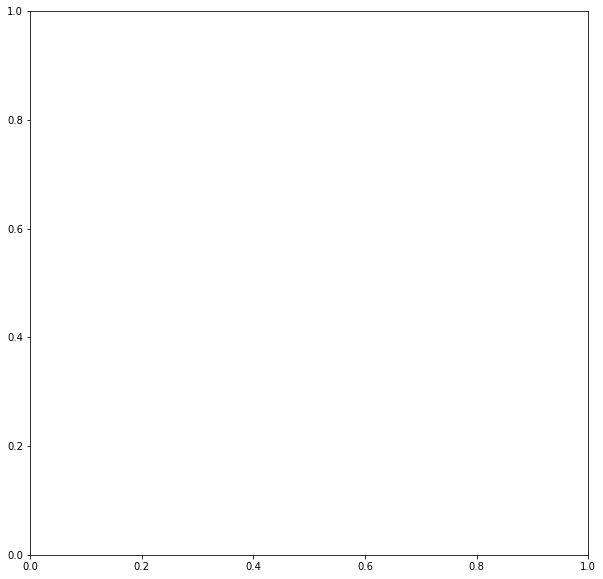

In [12]:
# Plot PCA reduced data
plt.figure(figsize=(10, 10))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Wine Dataset")
plt.show()